# MLP RNN 모델(다입력 다:1)
* 여러개의 컬럼이 있는 데이터를 잘라서 우리가 원하는 RNN 모델에 입력하는 학습 
* 데이터가 잘못 적용되어서 RNN이 제대로 적용되지 않은 경우라서 결과가 별로임.

## 1. 데이터

In [1]:
import numpy as np

* 3행 10열의 데이터 셋 준비 --> 10행 3열의 모양으로 변경 

In [3]:
dataset = np.array([[1,2,3,4,5,6,7,8,9,10],
                    [11,12,13,14,15,16,17,18,19,20],
                    [21,22,23,24,25,26,27,28,29,30]])
print("dataset.shape : ", dataset.shape)

dataset = np.transpose(dataset)
print("dataset.shape : ", dataset.shape)

dataset.shape :  (3, 10)
dataset.shape :  (10, 3)


#### 데이터 자르기 함수 

In [4]:
def split_xy3(dataset, time_steps, y_column):
    x, y = list(), list()
    
    for i in range(len(dataset)):
        
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column -1
        
        if y_end_number > len(dataset):
            break;
        
        tmp_x = dataset[i:x_end_number, :-1]               # 정해진 범위의 행과 마지막 전까지 데이터 추출 
        tmp_y = dataset[x_end_number-1:y_end_number, -1]   # 정해진 범위의 마지막 행의 마지막 데이터 추출 
    
        x.append(tmp_x)
        y.append(tmp_y)
        
    return np.array(x), np.array(y)

* x는 3개씩, y는 1개씩 잘라서 사용 
* 데이터 입력 (?, 3, 2)
* 출력 (8, )

In [6]:
x, y = split_xy3(dataset, 3, 1)
print(x, "\n", y)
print(x.shape)
print(y.shape)

[[[ 1 11]
  [ 2 12]
  [ 3 13]]

 [[ 2 12]
  [ 3 13]
  [ 4 14]]

 [[ 3 13]
  [ 4 14]
  [ 5 15]]

 [[ 4 14]
  [ 5 15]
  [ 6 16]]

 [[ 5 15]
  [ 6 16]
  [ 7 17]]

 [[ 6 16]
  [ 7 17]
  [ 8 18]]

 [[ 7 17]
  [ 8 18]
  [ 9 19]]

 [[ 8 18]
  [ 9 19]
  [10 20]]] 
 [[23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]]
(8, 3, 2)
(8, 1)


* RNN에 맞는 입력 모양을 고려해야 함 --> 2차원에서 3차원으로 변경이 필요함!!
* 3차원 형태(사용하는 용어)
    - (samples, time_step, feature)
    - (행, 열, 특성)
    - (행, 열, 피쳐)
    - (행, 열, 몇개씩 자르는지)
    - (샘플수, 타임스탭, 피쳐) 
    - (전체데이터수, 컬럼, 특성)
    - (전체데이터수, 컬럼, 몇개씩자르는지)
* RNN은 3차원, input_shape=(?,?)는 2차원 
    - input_shape가 2차원인 이유는 __"행무시"__ 때문
* x : (8, 3, 2)
    - 8는 행이므로 '행무시'
    - 3는 3개의 열을 
    - 4은 2개씩 잘라서 사용 
* y : (8, 1)
    - 모델의 아웃풋에서 사용할 수 있도록 y값을 벡터 형태로 변경 (8, )
    - 출력값은 8개짜리 벡터의 1차원 모습 

In [8]:
y = y.reshape(y.shape[0])
print(y.shape)

(8,)


## 2. 모델 구성

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

* input_shape(3,2) : 3개의 컬럼을 1개씩 잘라서 쓰는 LSTM을 구성하겠다는 의미

In [10]:
model = Sequential()
model.add(LSTM(64, input_shape=(3, 2)))
model.add(Dense(1))   # y값이 1개이기 때문에 1로 설정 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17152     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 17,217
Trainable params: 17,217
Non-trainable params: 0
_________________________________________________________________


## 3. 훈련

In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x, y, epochs=300, batch_size=1)

Train on 8 samples
Epoch 1/300
8/8 [==============================] - 3s 410ms/sample - loss: 680.6267 - mse: 680.6268
Epoch 2/300
8/8 [==============================] - 0s 2ms/sample - loss: 619.7408 - mse: 619.7408
Epoch 3/300
8/8 [==============================] - 0s 3ms/sample - loss: 561.5095 - mse: 561.5095
Epoch 4/300
8/8 [==============================] - 0s 2ms/sample - loss: 506.1092 - mse: 506.1093
Epoch 5/300
8/8 [==============================] - 0s 3ms/sample - loss: 450.9649 - mse: 450.9649
Epoch 6/300
8/8 [==============================] - 0s 3ms/sample - loss: 397.4837 - mse: 397.4837
Epoch 7/300
8/8 [==============================] - 0s 2ms/sample - loss: 347.0148 - mse: 347.0148
Epoch 8/300
8/8 [==============================] - 0s 2ms/sample - loss: 300.5959 - mse: 300.5959
Epoch 9/300
8/8 [==============================] - 0s 3ms/sample - loss: 258.1935 - mse: 258.1935
Epoch 10/300
8/8 [==============================] - 0s 3ms/sample - loss: 221.4608 - mse: 221.460

Epoch 86/300
8/8 [==============================] - 0s 3ms/sample - loss: 3.3233 - mse: 3.3233
Epoch 87/300
8/8 [==============================] - 0s 2ms/sample - loss: 3.1832 - mse: 3.1832
Epoch 88/300
8/8 [==============================] - 0s 2ms/sample - loss: 3.0885 - mse: 3.0885
Epoch 89/300
8/8 [==============================] - 0s 2ms/sample - loss: 3.0226 - mse: 3.0226
Epoch 90/300
8/8 [==============================] - 0s 2ms/sample - loss: 2.8335 - mse: 2.8335
Epoch 91/300
8/8 [==============================] - 0s 2ms/sample - loss: 2.6808 - mse: 2.6808
Epoch 92/300
8/8 [==============================] - 0s 2ms/sample - loss: 2.5912 - mse: 2.5912
Epoch 93/300
8/8 [==============================] - 0s 2ms/sample - loss: 2.5130 - mse: 2.5130
Epoch 94/300
8/8 [==============================] - 0s 2ms/sample - loss: 2.3856 - mse: 2.3856
Epoch 95/300
8/8 [==============================] - 0s 2ms/sample - loss: 2.2780 - mse: 2.2780
Epoch 96/300
8/8 [==============================] 

8/8 [==============================] - 0s 3ms/sample - loss: 0.0670 - mse: 0.0670
Epoch 172/300
8/8 [==============================] - 0s 3ms/sample - loss: 0.0635 - mse: 0.0635  
Epoch 173/300
8/8 [==============================] - 0s 3ms/sample - loss: 0.0634 - mse: 0.0634  
Epoch 174/300
8/8 [==============================] - 0s 3ms/sample - loss: 0.0598 - mse: 0.0598  
Epoch 175/300
8/8 [==============================] - 0s 2ms/sample - loss: 0.0601 - mse: 0.0601  
Epoch 176/300
8/8 [==============================] - 0s 3ms/sample - loss: 0.0559 - mse: 0.0559
Epoch 177/300
8/8 [==============================] - 0s 3ms/sample - loss: 0.0563 - mse: 0.0563
Epoch 178/300
8/8 [==============================] - 0s 3ms/sample - loss: 0.0531 - mse: 0.0531  
Epoch 179/300
8/8 [==============================] - 0s 2ms/sample - loss: 0.0514 - mse: 0.0514
Epoch 180/300
8/8 [==============================] - 0s 2ms/sample - loss: 0.0498 - mse: 0.0498
Epoch 181/300
8/8 [=========================

8/8 [==============================] - 0s 3ms/sample - loss: 0.0126 - mse: 0.0126
Epoch 256/300
8/8 [==============================] - 0s 3ms/sample - loss: 0.0090 - mse: 0.0090  
Epoch 257/300
8/8 [==============================] - 0s 2ms/sample - loss: 0.0102 - mse: 0.0102
Epoch 258/300
8/8 [==============================] - 0s 2ms/sample - loss: 0.0091 - mse: 0.0091
Epoch 259/300
8/8 [==============================] - 0s 2ms/sample - loss: 0.0083 - mse: 0.0083
Epoch 260/300
8/8 [==============================] - 0s 2ms/sample - loss: 0.0101 - mse: 0.0101
Epoch 261/300
8/8 [==============================] - 0s 2ms/sample - loss: 0.0099 - mse: 0.0099
Epoch 262/300
8/8 [==============================] - 0s 2ms/sample - loss: 0.0085 - mse: 0.0085
Epoch 263/300
8/8 [==============================] - 0s 2ms/sample - loss: 0.0114 - mse: 0.0114  
Epoch 264/300
8/8 [==============================] - 0s 3ms/sample - loss: 0.0145 - mse: 0.0145
Epoch 265/300
8/8 [==============================]

## 4. 학습과정확인

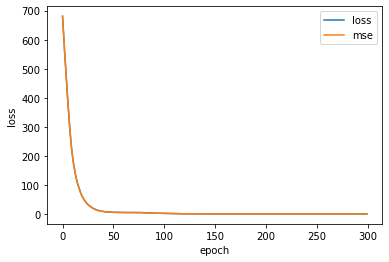

In [12]:
import matplotlib.pyplot as plt
# print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
# #plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show()

## 5. 평가 예측
* 예측값 데이터로 사용하기 위해 모양을 맞춰줘야 한다.(3차원!!)

In [13]:
loss, mse = model.evaluate(x, y )
print("loss : ", loss)
print("mse : ", mse)

8/8 [==============================] - 0s 27ms/sample - loss: 0.0093 - mse: 0.0093
loss :  0.009309870190918446
mse :  0.00930987


In [16]:
x_predict = np.array([[9, 10, 11], [19, 20, 21]])
print(x_predict.shape) 
x_predict = np.transpose(x_predict)
print(x_predict.shape) 
x_predict = x_predict.reshape(1, x_predict.shape[0], x_predict.shape[1])
print(x_predict.shape)

(2, 3)
(3, 2)
(1, 3, 2)


* mse :  0.00930987 로 상당히 좋은 결과인 경우 
* 실제 31을 예상하고 예측값 :  [[30.152777]] 로 많이 차이의 오차가 있는 경우 

In [17]:
y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

예측값 :  [[30.152777]]
